### Model
- MLP
- GBDT
- GRU
- AGRU

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Attention, Layer, GRU, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import sqrt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings

# Suppress the warning
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

path_cloud = '/mnt/CY/'
path_local = 'D:\\AI_data_analysis\\CY\\'

### Sequence preprocessing

In [12]:
# Load the numpy array from the file
train_X = np.load(path_local + 'train_X.npy')
train_y = np.load(path_local + 'train_y.npy')
test_X = np.load(path_local + 'test_X.npy')
test_y = np.load(path_local + 'test_y.npy')

In [13]:
# # Define model architecture
# sequence_length = 30 
# model = Sequential()
# model.add(
#     GRU(
#         30,
#         input_shape=(sequence_length, 6),
#         return_sequences=True,
#         dropout=0.1,
#         recurrent_dropout=0.1,
#     )
# )
# model.add(GRU(30, dropout=0.1, recurrent_dropout=0.1))
# model.add(Dense(1))

# # Define learning rate schedule function for step decay
# initial_learning_rate = 1e-3
# decay_steps = 20
# decay_rate = 1.5

# def lr_schedule(epoch, lr):
#     if epoch % decay_steps == 0 and epoch:
#         return lr * decay_rate
#     return lr

# # Compile the model with initial learning rate.
# optimizer = Adam(learning_rate=initial_learning_rate)
# model.compile(loss="mse", optimizer=optimizer)

# # Set up early stopping
# early_stopping = EarlyStopping(
#     monitor="loss", patience=20, restore_best_weights=True
# )
# # Set up learning rate scheduler
# lr_scheduler = LearningRateScheduler(lr_schedule)

# # Train the model
# # Use batch size equal to number of stocks in training dataset
# batch_size = 1986
# history = model.fit(
#     train_X, 
#     train_y,
#     epochs=200,
#     batch_size=batch_size,
#     callbacks=[early_stopping, lr_scheduler]
# )

# # Evaluate the model on test data
# y_pred_GRU_train = model.predict(train_X)
# y_pred_GRU_test = model.predict(test_X)
# mse_GRU_train = mean_squared_error(train_y, y_pred_GRU_train)
# mse_GRU_test = mean_squared_error(test_y, y_pred_GRU_test)
# print(f"GRU MSE(train): {mse_GRU_train}")
# print(f"GRU MSE(test): {mse_GRU_test}")

In [14]:
# mse_GRU_train = mean_squared_error(train_y, y_pred_GRU_train)
# mse_GRU_test = mean_squared_error(test_y, y_pred_GRU_test)
# print(f"GRU MSE(train): {mse_GRU_train}")
# print(f"GRU MSE(test): {mse_GRU_test}")

'''
GRU MSE(train): 0.9609560786222137
GRU MSE(test): 1.0166027871917824
'''

'\nGRU MSE(train): 0.9609560786222137\nGRU MSE(test): 1.0166027871917824\n'

In [15]:
# y_pred_GRU_test = np.array(y_pred_GRU_test)
# np.save(path + 'y_pred_GRU_test.npy', y_pred_GRU_test)

In [16]:
# y_pred_GRU_test = np.load(path + 'y_pred_GRU_test.npy')
# y_pred_GRU_test

### Model —— AGRU

In [17]:
# class AGRU(Layer):
#     def __init__(self, units, return_sequences=False, dropout=0.1, recurrent_dropout=0.1, **kwargs):
#         super(AGRU, self).__init__(**kwargs)
#         self.units = units
#         self.return_sequences = return_sequences
#         self.dropout = dropout
#         self.recurrent_dropout = recurrent_dropout
    
#     def build(self, input_shape):
#         self.gru = tf.keras.layers.GRU(
#             self.units,
#             return_sequences=self.return_sequences,
#             dropout=self.dropout,
#             recurrent_dropout=self.recurrent_dropout
#         )
#         super(AGRU, self).build(input_shape)
    
#     def call(self, inputs):
#         gru_output = self.gru(inputs)
#         return gru_output

In [18]:
# # Define the model
# model = Sequential(
#     [
#         AGRU(
#             6,
#             return_sequences=True,
#             dropout=0.1,
#             recurrent_dropout=0.1,
#             input_shape=(30, 6),
#         ),
#         AGRU(6, return_sequences=True, dropout=0.1, recurrent_dropout=0.1),
#         Attention(),
#         Dense(1),
#     ]
# )

# # Compile the model
# optimizer = Adam(learning_rate=1e-3)
# model.compile(optimizer=optimizer, loss=MeanSquaredError())

# # Train the model
# early_stopping = EarlyStopping(
#     monitor="val_loss", patience=20, restore_best_weights=True
# )
# model.fit(
#     price_X_train,
#     price_y_train,
#     validation_data=(price_X_test, price_y_test),
#     epochs=200,
#     batch_size=len(price_X_train),
#     callbacks=[early_stopping],
# )

# # Evaluate the model

# y_pred_AGRU_train = model.predict(price_X_train)
# y_pred_AGRU_test = model.predict(price_X_test)
# mse_AGRU_train = mean_squared_error(price_y_train, y_pred_AGRU_train)
# mse_AGRU_test = mean_squared_error(price_y_test, y_pred_AGRU_test)

# print(f"AGRU MSE(train): {mse_AGRU_train}")
# print(f"AGRU MSE(test): {mse_AGRU_test}")

In [19]:
# # Define the AGRU model
# inputs = Input(shape=(30, 6))
# gru = GRU(units=6, return_sequences=True)(inputs)
# att = Attention()([gru, gru])
# gru = GRU(units=6)(att)
# outputs = Dense(1)(gru)

# model = Model(inputs=inputs, outputs=outputs)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")

# # Define early stopping criteria
# early_stopping = EarlyStopping(
#     monitor="loss", patience=20, restore_best_weights=True
# )

# # Train the model
# history = model.fit(
#     train_X,
#     train_y,
#     epochs=200,
#     batch_size=1986,
#     validation_data=(test_X, test_y),
#     callbacks=[early_stopping],
# )

# # Evaluate the model
# loss = model.evaluate(test_X, test_y)

# print("Model trained with loss:", loss)

In [20]:
model = tf.keras.models.load_model(path_local + 'AGRU_model.keras')

#### 

In [21]:
# Evaluate the model on test data
y_pred_AGRU_train = model.predict(train_X)
y_pred_AGRU_test = model.predict(test_X)
mse_AGRU_train = mean_squared_error(train_y, y_pred_AGRU_train)
mse_AGRU_test = mean_squared_error(test_y, y_pred_AGRU_test)
print(f"AGRU MSE(train): {mse_AGRU_train}")
print(f"AGRU MSE(test): {mse_AGRU_test}")

'''
AGRU MSE(train): 0.9847706816340175
AGRU MSE(test): 0.9997533484089924
'''

9310/9310 [==============================] - 65s 7ms/step
AGRU MSE(train): 0.9847706816340175
AGRU MSE(test): 0.9997533484089924


'\nAGRU MSE(train): 0.9847706816340175\nAGRU MSE(test): 0.9997533484089924\n'

In [22]:
price_processed = pd.read_csv(path_local + 'price_processed.csv',
                              parse_dates=['trade_date'])
X_indexes = ['OPEN_processed',
             'HIGH_processed', 
             'LOW_processed', 
             'CLOSE_processed', 
             'VWAP_processed',
             'VOLUME_processed']
price_X_all = price_processed[X_indexes].values

In [23]:
# model.save(path_local + 'AGRU_model.keras')

In [24]:
len(y_pred_AGRU_train)

1132020

In [25]:
len(y_pred_AGRU_test)

297900

In [26]:
len(y_pred_AGRU_train) + len(y_pred_AGRU_test)

1429920

In [27]:
y_pred_AGRU_all = np.concatenate((y_pred_AGRU_train.reshape(-1), y_pred_AGRU_test.reshape(-1)))

In [28]:
y_pred_AGRU_all

array([-0.3923676 , -0.4224947 , -0.4307228 , ...,  0.11079773,
        0.10644159,  0.10686412], dtype=float32)

In [29]:
len(y_pred_AGRU_all)

1429920

In [30]:
# np.save(path_local + 'y_pred_AGRU_all.npy', y_pred_AGRU_all.reshape(-1))
# np.save(path_local + 'y_pred_AGRU_test.npy', y_pred_AGRU_test.reshape(-1))

### Back testing

In [31]:
price_test = pd.read_csv(path_local + 'price_test.csv',
                         parse_dates=["trade_date"])

In [32]:
price_return_test = pd.read_csv(path_local + 'price_return_test.csv',
                                parse_dates=['trade_date'],
                                index_col="trade_date")

In [33]:
price_return_test

,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,601919.SH,601933.SH,601939.SH,601958.SH,601988.SH,601989.SH,601991.SH,601992.SH,601998.SH,601999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-06-27,0.007143,0.038406,0.000000,0.037123,0.012987,0.005833,0.038278,0.024070,0.006849,0.068681,...,0.011163,0.012987,0.016287,0.012844,0.021164,0.058442,-0.008876,0.018692,0.006757,0.004471
2023-06-28,0.001773,-0.006289,0.022973,-0.009112,-0.004274,-0.018197,-0.004587,-0.003215,-0.001698,-0.006891,...,-0.011579,0.000000,-0.006410,-0.002720,0.002591,-0.004115,0.014925,-0.004587,-0.003350,-0.008969
2023-06-29,-0.009743,-0.012685,0.076043,-0.002304,0.008584,-0.003367,0.027907,-0.006486,0.003401,-0.011384,...,-0.006383,0.003205,-0.001610,0.001835,-0.002584,0.002075,-0.023460,-0.004630,-0.001686,0.000000
2023-06-30,0.004472,-0.004261,-0.016129,0.006912,0.004255,0.022881,0.036364,0.008686,0.011885,0.005272,...,0.005348,0.000000,0.004815,0.019196,0.010336,-0.004132,-0.006006,0.009259,0.013559,0.006006
2023-07-03,0.022242,0.007117,-0.085317,0.006834,0.004237,-0.004139,0.012931,0.006424,0.020168,0.008741,...,0.011702,0.012821,0.012780,0.007136,0.015306,0.012371,-0.003003,0.013699,-0.016447,-0.005970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.018221,0.052854,0.062958,0.040268,0.031674,0.006867,0.007168,0.035370,0.021938,0.016020,...,0.025510,0.022989,0.006006,0.051613,0.009732,0.056098,0.054852,0.027473,0.029412,0.083205
2024-01-26,0.015839,0.025126,0.021424,0.023913,0.008772,-0.003419,0.007168,0.041973,0.001789,0.102244,...,0.008902,0.000000,0.022422,-0.021363,0.033816,0.011628,0.004016,0.026738,0.008361,0.015850
2024-01-29,0.001032,-0.033622,0.029006,-0.014583,-0.013100,0.028302,-0.032258,-0.030519,-0.010676,-0.103496,...,-0.008780,-0.026022,0.005831,-0.023810,0.002331,-0.002299,0.004000,-0.015625,0.046434,-0.028571


In [34]:
HS_300_test = pd.read_csv(path_local + 'HS_300_test.csv',
                          parse_dates=['trade_date'],
                          index_col=['trade_date'])
HS_300_test = HS_300_test['000300.SH']

CS_500_test = pd.read_csv(path_local + 'CS_500_test.csv',
                          parse_dates=['trade_date'],
                          index_col=['trade_date'])
CS_500_test = CS_500_test['000905.SH']

CS_1000_test = pd.read_csv(path_local + 'CS_1000_test.csv',
                          parse_dates=['trade_date'],
                          index_col=['trade_date'])
CS_1000_test = CS_1000_test['000852.SH']

In [35]:
HS_300_test

trade_date
2023-06-27    0.008852
2023-06-28    0.001092
2023-06-29   -0.003881
2023-06-30    0.006844
2023-07-03    0.010274
                ...   
2024-01-25    0.020945
2024-01-26    0.002155
2024-01-29   -0.009423
2024-01-30   -0.011833
2024-01-31   -0.005010
Name: 000300.SH, Length: 150, dtype: float64

In [36]:
AGRU_factor_df = price_test[['trade_date', 'ts_code']] # Date and stock
AGRU_factor_df.loc[:, 'Factor_values'] = y_pred_AGRU_test # Add factor values
AGRU_factor_df = AGRU_factor_df.pivot(index='trade_date', 
                      columns='ts_code', 
                      values='Factor_values') # Transfer to factor dataframe
AGRU_factor_df

ts_code,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,601919.SH,601933.SH,601939.SH,601958.SH,601988.SH,601989.SH,601991.SH,601992.SH,601998.SH,601999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-06-27,-0.040573,0.046522,0.113714,0.122455,0.004467,0.041332,0.047514,0.038146,0.046242,0.060786,...,0.052226,0.032698,-0.059583,-0.051996,0.112994,0.134677,0.014503,0.062593,-0.050192,0.012285
2023-06-28,-0.035479,0.071953,0.020029,0.357932,-0.360846,0.013083,0.080037,-0.125313,0.054903,-0.008902,...,-0.088987,-0.009291,0.090788,0.059493,-0.230661,-0.212634,0.069959,-0.319704,0.054769,0.050078
2023-06-29,0.017016,-0.293963,-0.036552,0.066872,0.005012,0.044900,-0.004690,0.048814,0.059708,0.054328,...,0.023454,0.038955,-0.131035,0.012705,0.038420,-0.094822,-0.003628,0.104371,-0.008147,-0.085970
2023-06-30,-0.066896,0.011843,0.098725,-0.092492,0.041031,0.013833,-0.276682,-0.014968,-0.224183,0.047061,...,0.003103,0.034407,-0.093883,0.011800,-0.140182,-0.052056,-0.009668,-0.058635,0.079316,0.035386
2023-07-03,0.024482,0.081319,-0.205211,0.061744,0.046949,0.041207,0.024834,-0.024654,0.044653,0.042092,...,0.096654,0.013984,0.021333,0.003330,-0.030089,0.011068,0.014549,-0.087166,0.046524,0.085692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.038316,0.056411,0.052937,0.036800,0.051900,0.075221,0.054635,-0.008623,-0.009300,-0.010179,...,-0.306155,0.063025,0.086669,0.014987,-0.200336,0.015645,0.126780,-0.108726,0.032382,-0.146230
2024-01-26,0.133006,-0.305267,0.068869,0.059015,-0.364142,0.035946,0.068995,-0.024826,-0.357196,-0.028324,...,0.034580,0.048541,0.038347,0.057372,0.045677,-0.038636,-0.049498,0.170442,-0.042532,-0.013070
2024-01-29,-0.306699,-0.049392,0.059412,0.078728,-0.261978,0.008346,-0.241114,-0.045220,-0.027157,0.053792,...,0.124603,0.064194,-0.146930,0.042109,-0.197461,-0.040075,0.078397,-0.006771,0.057887,-0.026674


In [44]:
AGRU_factor_df.to_csv(path_local + 'AGRU_factor_df.csv')

In [37]:
# layer number
num_layers = 20

# Calculte the ranks of factors daily.
factor_ranks = AGRU_factor_df.rank(axis=1, ascending=False)

# The factor ordering is divided into num_layers, each of which allocates funds equally.
layer_allocation = (factor_ranks // (len(AGRU_factor_df.columns) / num_layers)).fillna(0)
layer_allocation

ts_code,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,601919.SH,601933.SH,601939.SH,601958.SH,601988.SH,601989.SH,601991.SH,601992.SH,601998.SH,601999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-06-27,16.0,7.0,0.0,0.0,13.0,8.0,6.0,9.0,7.0,4.0,...,5.0,10.0,17.0,17.0,0.0,0.0,12.0,3.0,16.0,12.0
2023-06-28,12.0,3.0,7.0,0.0,19.0,7.0,2.0,15.0,4.0,10.0,...,14.0,10.0,2.0,4.0,17.0,17.0,3.0,19.0,4.0,5.0
2023-06-29,13.0,19.0,16.0,5.0,13.0,9.0,14.0,9.0,6.0,7.0,...,12.0,10.0,18.0,13.0,10.0,17.0,14.0,1.0,14.0,17.0
2023-06-30,14.0,9.0,2.0,15.0,7.0,9.0,18.0,11.0,18.0,6.0,...,10.0,8.0,15.0,9.0,16.0,14.0,10.0,14.0,3.0,7.0
2023-07-03,9.0,3.0,19.0,4.0,5.0,6.0,9.0,15.0,6.0,6.0,...,2.0,11.0,10.0,13.0,16.0,12.0,11.0,17.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,9.0,6.0,7.0,10.0,7.0,3.0,6.0,14.0,14.0,14.0,...,19.0,5.0,2.0,12.0,18.0,12.0,0.0,17.0,10.0,18.0
2024-01-26,1.0,19.0,4.0,6.0,19.0,9.0,4.0,12.0,19.0,12.0,...,9.0,7.0,9.0,6.0,8.0,13.0,14.0,0.0,13.0,11.0
2024-01-29,19.0,14.0,5.0,3.0,19.0,10.0,18.0,14.0,13.0,6.0,...,1.0,4.0,17.0,7.0,18.0,13.0,3.0,11.0,5.0,13.0


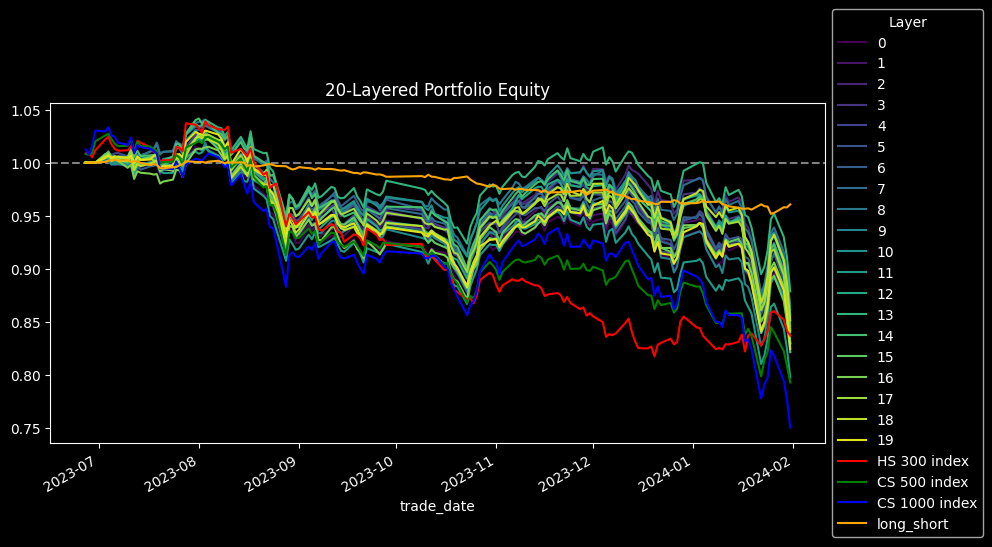

In [38]:
# import matplotlib.cm as cm

plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
plt.figure(figsize=(10, 5))
plt.axhline(y=1, color='grey', linestyle='--')

# Define a color map to use for changing colors progressively
# colors = plt.cm.jet(np.linspace(0, 1, num_layers))

def Ensure_position(DF):
    # We add a column named 'Monday' and change positions every Monday.
    DF = DF.shift(1) # Move one step forward to ensure position
    DF["Monday"] = (DF.index.dayofweek == 0).astype(int) # Shift except Monday

    # Get the columns to shift (all columns except 'Monday')
    cols_to_shift = DF.columns[DF.columns != 'Monday']

    DF.loc[DF['Monday'] == 0, cols_to_shift] = np.nan
    DF.fillna(method='ffill', inplace=True) # Forward fill, holing positions for a week.
    DF.fillna(value=0, inplace=True) # Fill remaining NaN with 0
    return DF

profit_long = None
profit_short = None
def Long_Short(Num_layers, Layer, Profit):
    global profit_long, profit_short
    if Layer == 0:
        profit_short = Profit
        # The short profit comes from the decline of the stock.
        profit_short = profit_short.apply(lambda x: x + 1 if x == 0 else -x + (1 - 0.0003))
        profit_short = profit_short.cumprod()
        profit_short *= 0.5
    elif Layer == Num_layers - 1:
        profit_long = Profit
        profit_long = profit_long.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
        profit_long = profit_long.cumprod()
        profit_long *= 0.5

Long_position_df = None
for layer in range(0, num_layers):
    # Ensure holding stocks
    hold_flag_matrix = layer_allocation.mask(layer_allocation != layer, 0).mask(layer_allocation == layer, 1)
    hold_flag_matrix = Ensure_position(hold_flag_matrix)
    if layer == num_layers - 1:
        Long_position_df = hold_flag_matrix

    # Delete 'Monday' to fit into yield dataframe.
    del hold_flag_matrix["Monday"]

    # Calculate the sum of each line in turn.
    stock_amount_sum = hold_flag_matrix.sum(axis=1)

    # Calculate the weight of each stock. (Average distribution at the same level)
    weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0).fillna(0)

    # Calculate the daily profit rate. And prepare to calculate cumprod.
    profit = (weight_allocation * price_return_test).sum(axis=1)

    # Create Long and Short position
    Long_Short(num_layers, layer, profit)

    # Calculate the daily equity and draw.
    # Using the 'viridis' colormap with a gradient based on layer number
    colors = cm.viridis(layer / num_layers)
    profit = profit.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit.cumprod().plot(label=layer, legend=True, color=colors)

profit_HS300 = HS_300_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
profit_HS300.cumprod().plot(label="HS 300 index", legend=True, color='r')
profit_CS500 = CS_500_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
profit_CS500.cumprod().plot(label="CS 500 index", legend=True, color='g')
profit_CS1000 = CS_1000_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
profit_CS1000.cumprod().plot(label="CS 1000 index", legend=True, color='b')

(profit_long + profit_short).plot(color='orange', label='long_short', legend=True)
plt.title("20-Layered Portfolio Equity")
plt.legend(title='Layer', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

### Indexes

1. RankIC mean(IC mean)
2. ICIR
3. IC winning rate
4. IC t-value
5. Long ROI
6. Long sharp
7. Long retracement
8. Long average weekly turnover rate

IC mean: 0.0005112003528268931
ICIR: 0.023754980112621824


<Axes: >

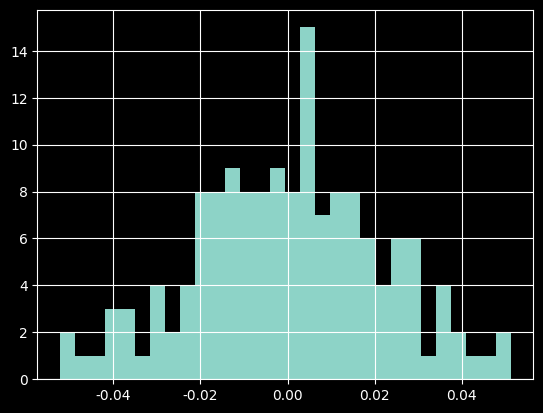

In [39]:
# ICIR
IC_series = AGRU_factor_df.corrwith(price_return_test, 
                                   axis=1,
                                   method='spearman')
IC_mean = IC_series.mean()
print(f'IC mean: {IC_mean}')
ICIR = IC_series.mean() / IC_series.std()
print(f"ICIR: {ICIR}")
IC_series.hist(bins=30)

In [40]:
# IC winning rate
IC_winning_rate = sum(1 for ic in IC_series if ic > 0) / len(IC_series)
print(f"IC winning rate: {IC_winning_rate}")

IC winning rate: 0.52


In [41]:
t_value = ICIR / sqrt(len(IC_series))
print(f"IC t-value: {t_value}")

IC t-value: 0.0019395860041961847


In [42]:
# Long (Except Short), so `profit_long * 2`
# profit_long is long equity series.
Long_equity = profit_long * 2
Long_ROI = (Long_equity[-1]) - 1
print(f"Long ROI: {Long_ROI}")

# Max Drawdown
# Calculate the previous peaks
previous_peaks = Long_equity.cummax()
# Calculate the drawdowns
drawdowns = (Long_equity - previous_peaks) / previous_peaks

# Find the maximum drawdown and the dates associated with it
# Convert the index labels to a numeric format
drawdowns.index = pd.to_numeric(drawdowns.index)
max_drawdown = drawdowns.min()
print(f'Max drawdown: {max_drawdown}')
max_drawdown_start = drawdowns.idxmin()

# Convert the start and end dates back to the original format if needed
max_drawdown_start = pd.to_datetime(max_drawdown_start).date()
print(f"Max drawdown begin date: {max_drawdown_start}")

Long ROI: -0.175648361619263
Max drawdown: -0.19982973522625175
Max drawdown begin date: 2024-01-31
